# Dow Jones Industrial Average (^DJI)


Source
- [Yahoo finance ^DJIA](https://finance.yahoo.com/quote/%5EDJI/history?period1=475804800&period2=1601251200&interval=1d&filter=history&frequency=1d)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sample the data</a></span></li></ul></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Rata Die</a></span><ul class="toc-item"><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Draw Plots</a></span></li><li><span><a href="#set-the-original-value-column" data-toc-modified-id="set-the-original-value-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>set the original value column</a></span></li></ul></li><li><span><a href="#Extract-right-columns" data-toc-modified-id="Extract-right-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extract right columns</a></span></li><li><span><a href="#Quantize-the-values" data-toc-modified-id="Quantize-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quantize the values</a></span></li><li><span><a href="#Fill-in-Empty-Dates" data-toc-modified-id="Fill-in-Empty-Dates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fill in Empty Dates</a></span><ul class="toc-item"><li><span><a href="#Fill:-Sort" data-toc-modified-id="Fill:-Sort-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fill: Sort</a></span></li><li><span><a href="#Fill:-Draw-Plots" data-toc-modified-id="Fill:-Draw-Plots-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Fill: Draw Plots</a></span></li></ul></li><li><span><a href="#Averages" data-toc-modified-id="Averages-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Averages</a></span><ul class="toc-item"><li><span><a href="#Averages:-Draw-Plots" data-toc-modified-id="Averages:-Draw-Plots-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Averages: Draw Plots</a></span></li><li><span><a href="#Insert-averages-to-DataFrame" data-toc-modified-id="Insert-averages-to-DataFrame-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Insert averages to DataFrame</a></span></li></ul></li><li><span><a href="#Position-on-given-Date" data-toc-modified-id="Position-on-given-Date-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Position on given Date</a></span><ul class="toc-item"><li><span><a href="#Position:-Draw-Plots" data-toc-modified-id="Position:-Draw-Plots-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Position: Draw Plots</a></span></li></ul></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save DataFrame to CSV file</a></span><ul class="toc-item"><li><span><a href="#Save:-Describe-before-saving" data-toc-modified-id="Save:-Describe-before-saving-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Save: Describe before saving</a></span></li><li><span><a href="#Write-as-CSV-file" data-toc-modified-id="Write-as-CSV-file-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Write as CSV file</a></span></li></ul></li></ul></div>

## Set Up

In [17]:
println("Run this file from the directory where this file is located.")
pwd()

Run this file from the directory where this file is located.


"/Users/uki/REPOS/MarketIndicators.jl/src/notebooks_indicators"

In [2]:
dataset_file_name = "^DJI.csv"
path_data_original = "../Data/original/"
date_original_format = "yyyy-mm-dd"
original_value_column = 4
last_position_change = "2020-09-30"

# notebooks are in one folder higher
#include("../MarketIndicators.jl") 
include("../Julia/functions.jl")

## Read Data

In [3]:
#data = available_datasets() # uncomment to see all available datasets

df = fetch_dataset(dataset_file_name, date_original_format , path_data_original )
record_count = size(df)[1]
println("data dimentions: ", size(df) )

#using Statistics
#describe(df)

../Data/original/^DJI.csv
data dimentions: (9034, 7)


### Sample the data

In [4]:
columns = preview_data(df) # uncomment to see the data
println()

6×7 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Adj Close │
│     │ Date       │ Float64 │ Float64 │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 1985-01-29 │ 1277.72 │ 1295.49 │ 1266.89 │ 1292.62 │ 1292.62   │
│ 2   │ 1991-01-15 │ 2485.64 │ 2504.46 │ 2470.05 │ 2490.59 │ 2490.59   │
│ 3   │ 1996-12-27 │ 6543.6  │ 6576.28 │ 6537.46 │ 6560.91 │ 6560.91   │
│ 4   │ 2002-12-23 │ 8511.39 │ 8554.04 │ 8462.64 │ 8493.29 │ 8493.29   │
│ 5   │ 2008-12-16 │ 8565.65 │ 8958.79 │ 8565.65 │ 8924.14 │ 8924.14   │
│ 6   │ 2014-12-10 │ 17798.0 │ 17798.0 │ 17508.1 │ 17533.2 │ 17533.2   │

│ Row │ Volume    │
│     │ Int64     │
├─────┼───────────┤
│ 1   │ 13560000  │
│ 2   │ 11710000  │
│ 3   │ 20860000  │
│ 4   │ 184910000 │
│ 5   │ 337190000 │
│ 6   │ 115100000 │
 Dataset dimentions: (9034, 7)

 variable columns:
1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume



## Rata Die

In [5]:
col_ind = 1
insertcols!(df, col_ind, :Rata_Die => zeros(Int64, record_count); makeunique = true )

update_rata_die!(df, 1, 2)
#first(df, 6)

#columns = preview_data(df, 3)
println()

### Draw Plots

### set the original value column
- go back to the top "Setup" section and choose which column should be the "Orignal value"
- re-run the notebook

## Extract right columns

In [6]:
using DataFrames
df = DataFrame( Day      = df[:,1],                     # 1 
                Date     = df[:,2],                     # 2 
                Value    = df[:,original_value_column], # 3 
                Original = df[:,original_value_column]  # 4 
               )

columns = preview_data(df)
println()

6×4 DataFrame
│ Row │ Day    │ Date       │ Value   │ Original │
│     │ Int64  │ Date       │ Float64 │ Float64  │
├─────┼────────┼────────────┼─────────┼──────────┤
│ 1   │ 724670 │ 1985-01-29 │ 1295.49 │ 1295.49  │
│ 2   │ 726847 │ 1991-01-15 │ 2504.46 │ 2504.46  │
│ 3   │ 729020 │ 1996-12-27 │ 6576.28 │ 6576.28  │
│ 4   │ 731207 │ 2002-12-23 │ 8554.04 │ 8554.04  │
│ 5   │ 733392 │ 2008-12-16 │ 8958.79 │ 8958.79  │
│ 6   │ 735577 │ 2014-12-10 │ 17798.0 │ 17798.0  │
 Dataset dimentions: (9034, 4)

 variable columns:
1 Day
2 Date
3 Value
4 Original



## Quantize the values

- Quantization is a process of noramalizing the data
- I have decided to normalize the data for Int8 as I might try use Google Coral NPU
- minimum = -128.0
- maximum = 127.0

In [7]:
data_original = df[:, 4] # keep original for display comparison later

quantize_column!(df, 3)

columns = preview_data(df)
println()

bias for 0 value: -0.04334650841850143
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 1251.209961
maximum = 30116.509766
Save these values for later to run model preditions
6×4 DataFrame
│ Row │ Day    │ Date       │ Value   │ Original │
│     │ Int64  │ Date       │ Float64 │ Float64  │
├─────┼────────┼────────────┼─────────┼──────────┤
│ 1   │ 724670 │ 1985-01-29 │ -128.0  │ 1295.49  │
│ 2   │ 726847 │ 1991-01-15 │ -117.0  │ 2504.46  │
│ 3   │ 729020 │ 1996-12-27 │ -81.0   │ 6576.28  │
│ 4   │ 731207 │ 2002-12-23 │ -63.0   │ 8554.04  │
│ 5   │ 733392 │ 2008-12-16 │ -60.0   │ 8958.79  │
│ 6   │ 735577 │ 2014-12-10 │ 18.0    │ 17798.0  │
 Dataset dimentions: (9034, 4)

 variable columns:
1 Day
2 Date
3 Value
4 Original



## Fill in Empty Dates

In [8]:
populate_missing_dates!(df)

,Day,Date,Value,Original
,Int64,Date,Float64,Float64
1,724670,1985-01-29,-128.0,1295.49
2,724671,1985-01-30,-128.0,1305.1
3,724672,1985-01-31,-128.0,1293.4
4,724673,1985-02-01,-128.0,1286.11
5,724676,1985-02-04,-128.0,1294.94
6,724677,1985-02-05,-128.0,1301.13
7,724678,1985-02-06,-128.0,1294.5
8,724679,1985-02-07,-128.0,1297.04
9,724680,1985-02-08,-128.0,1297.15


### Fill: Sort

In [9]:
df = sort(df, [:Day]);
count = size(df)[1]
first(df, 6)
# columns = preview_data(df)
println()

### Fill: Draw Plots
- if the indicator is updated only preiodically (bi-weekly, monthly, quarterly) the the graph will appear blocky

## Averages

In [10]:
column_to_average = 3
averages005 = calculate_average(df, 5,   column_to_average )
averages030 = calculate_average(df, 30,  column_to_average )
averages090 = calculate_average(df, 90,  column_to_average )
averages180 = calculate_average(df, 180, column_to_average )
averages365 = calculate_average(df, 365, column_to_average )
println()

### Averages: Draw Plots

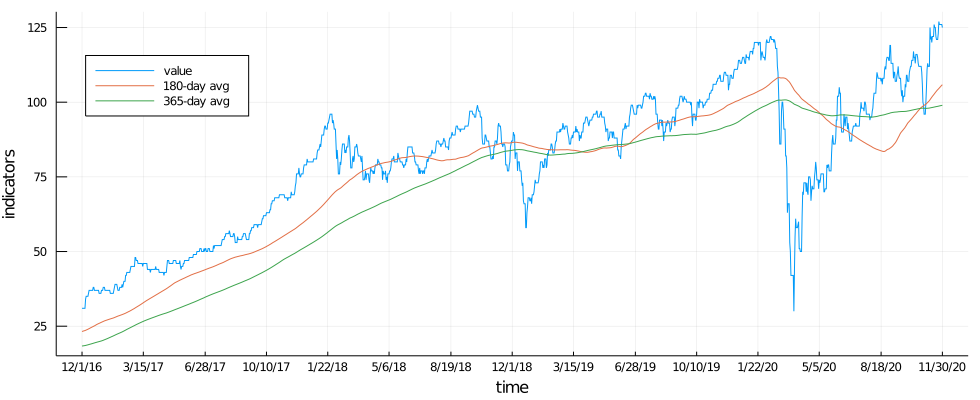

In [11]:
using Plots
columns = names(df)
count = size(df)[1]
days_back = 365*4
rows = count-days_back:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3] averages180[rows] averages365[rows]    ], # y-axis
    label    = [ "value" "180-day avg" "365-day avg"   ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

### Insert averages to DataFrame

In [12]:
insertcols!(df, 5,  :Avg005   => averages005  , makeunique=true)
insertcols!(df, 6,  :Avg030   => averages030  , makeunique=true)
insertcols!(df, 7,  :Avg090   => averages090  , makeunique=true)
insertcols!(df, 8,  :Avg180   => averages180  , makeunique=true)
insertcols!(df, 9,  :Avg365   => averages365  , makeunique=true)

using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,731214.0,724670,731214.0,737759,,,Int64
2,Date,,1985-01-29,,2020-11-30,13090,,Date
3,Value,-47.8137,-128.0,-49.0,127.0,,,Float64
4,Original,10328.3,1251.21,10202.9,30116.5,,,Float64
5,Avg005,-47.8133,-128.0,-49.0,126.2,,,Float64
6,Avg030,-47.8084,-128.0,-48.65,119.37,,,Float64
7,Avg090,-47.7703,-127.97,-48.135,115.23,,,Float64
8,Avg180,-47.6966,-127.66,-48.325,108.24,,,Float64
9,Avg365,-47.4453,-127.01,-48.36,100.78,,,Float64


## Position on given Date
- Indicates the date of the last major position event

In [13]:
position_column = position_on_date(df, last_position_change )
position_column[1:3]

3-element Array{Float64,1}:
 109.0
 109.0
 109.0

### Position: Draw Plots

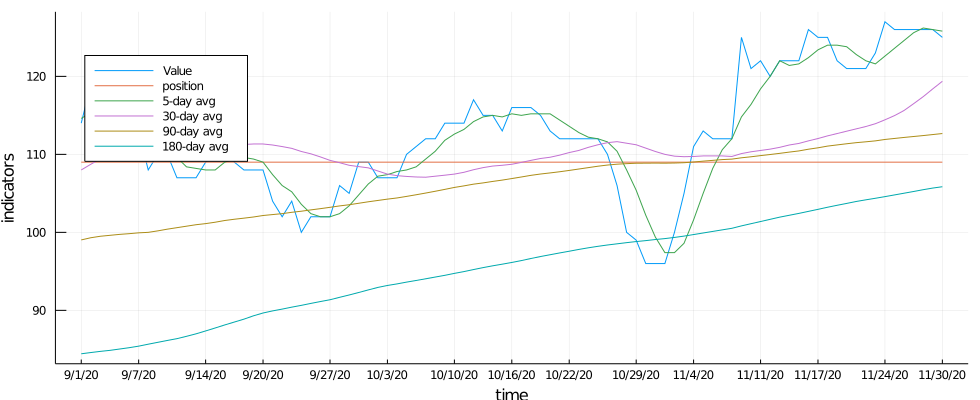

In [14]:
using Plots
count = size(df)[1]
days_back = 90
rows = count-days_back:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(   dates, # x-axis: dates
        [  df[rows,3] position_column[rows] averages005[rows] averages030[rows] averages090[rows] averages180[rows] 
        ], # y-axis
    label    = 
        [ columns[3] "position" "5-day avg" "30-day avg" "90-day avg" "180-day avg"  ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

[back to top](#Table-of-Contents)
<hr/>

## Save DataFrame to CSV file

### Save: Describe before saving

In [15]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,731214.0,724670,731214.0,737759,,,Int64
2,Date,,1985-01-29,,2020-11-30,13090,,Date
3,Value,-47.8137,-128.0,-49.0,127.0,,,Float64
4,Original,10328.3,1251.21,10202.9,30116.5,,,Float64
5,Avg005,-47.8133,-128.0,-49.0,126.2,,,Float64
6,Avg030,-47.8084,-128.0,-48.65,119.37,,,Float64
7,Avg090,-47.7703,-127.97,-48.135,115.23,,,Float64
8,Avg180,-47.6966,-127.66,-48.325,108.24,,,Float64
9,Avg365,-47.4453,-127.01,-48.36,100.78,,,Float64


### Write as CSV file

In [16]:
save_dataset(df, dataset_file_name, "../Data/processed/" );